In [83]:
from __future__ import division
from io import open
import sys
import time

In [85]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [153]:
class CutMethod(object):
    ROTATION = True
    NOT_ROTAION = False
    AS_WIDTH = True
    AS_LENGTH = False
    CONVEGE = list()
    
    def __init__(self, space, blocks, cut_method=None):
        self.spaces = [space]
        self.blocks = blocks
        
        if bool(cut_method) == False:
            self.DNAs = []
            
            DNA = [[], [], []]
            for i in range(len(blocks)):
                DNA[0].append(i)
                DNA[1].append(self.AS_WIDTH)
                DNA[2].append(self.NOT_ROTAION)
            self.DNAs.append(DNA)
            
            DNA = [[], [], []]
            for i in range(len(blocks)):
                DNA[0].append(i)
                DNA[1].append(self.AS_LENGTH)
                DNA[2].append(self.ROTATION)
            self.DNAs.append(DNA)
    
    def cut_block(self, block, spaces):
        blocks = self.blocks    
        split_method = block[1]
        rotation = block[2]
        # if rotation w and l need to exchange their value
        w, l = blocks[block[0]] if rotation == self.NOT_ROTAION else blocks[block[0]][::-1]
        
        loc = None
        for it, space in enumerate(spaces):
            W, L, x, y = space
            
            if w <= W and l <= L:
                loc = (x, y)
                
                if split_method == self.AS_WIDTH:
                    s1 = (W, L-l) + (x, y+l) # x is the W dim loc and y is the L dim loc
                    s2 = (W-w, l) + (x+w, y)
                    spaces[it:it+1] = [s1, s2]
                
                else:
                    s1 = (W-w, L) + (x+w, y)
                    s2 = (w, L-l) + (x, y+l)
                    spaces[it:it+1] = [s1, s2]
                
                break
                
        new_spaces = []
        
        for x in spaces:
            if x[0] != 0 and x[1] != 0:
                new_spaces.append(x)
        
        return new_spaces, loc # spaces should delete blocks which's dim is 0
    
    def evalue(self, DNA):
        
        spaces = self.spaces[:]
        spaces[0] += (0, 0)
        loc = [None]*len(self.blocks)
        
        DNA = [(x, y, z) for x,y,z in zip(DNA[0],DNA[1],DNA[2])] # nothing special don't mind
        
        for it, block in enumerate(DNA):
            spaces, loc[it] = self.cut_block(block, spaces)
        
        
        left_area = sum([x*y for x, y, _, _ in spaces])
        return left_area, spaces, loc
    
    
    def get_next_generation(self, n=10):
        DNAs = self.DNAs
        
        alive_DNAs = self.select_individual(DNAs[:])
        new_DNAs = self.mutation(alive_DNAs[:]) + self.sexual(alive_DNAs[:])
        
        self.DNAs = alive_DNAs + new_DNAs
        self.delete_same()
    
    def select_individual(self, DNAs, n=10, prob=0.3):
        evalue = self.evalue

        compare = lambda x, y: int(evalue(x)[0] > evalue(y)[0]) - 1
        
        DNAs = sorted(DNAs, compare) 
        must_alive = DNAs[:n]
        
        self.CONVEGE.append(evalue(DNAs[0])[0])
        
        bad_DNA = []
        for DNA in DNAs[n:]:
            if random.random() < prob:
                bad_DNA.append(DNA)
        
        return must_alive + bad_DNA
        
    def mutation(self, DNAs, prob=0.55):
        # copy DNAs
        for i in range(len(DNAs)):
            DNAs[i] = DNAs[i][:]
            for j in range(len(DNAs[i])):
                DNAs[i][j] = DNAs[i][j][:]
        
        
        _range = range(len(DNAs[0][0]))
        for i in range(len(DNAs)):
            if random.random() < prob:
                k, j = random.sample(_range, 2)
                DNAs[i][0][k], DNAs[i][0][j]= DNAs[i][0][j], DNAs[i][0][k] 
                
            for it in range(len(DNAs[i][0])):
                if random.random() < prob:
                    DNAs[i][1][it] = not DNAs[i][1][it]
                    
                if random.random() < prob:
                    DNAs[i][2][it] = not DNAs[i][2][it]
        
        return DNAs
    
    def sexual(self, DNAs):
        
        for i in range(len(DNAs)):
            DNAs[i] = DNAs[i][:]
            for j in range(len(DNAs[i])):
                DNAs[i][j] = DNAs[i][j][:]
        
        
        _range = range(len(DNAs[0][0]))
        n = len(DNAs)
        select_num = int(n/4)
        
        sex_DNAs = random.sample(DNAs, select_num)
        
        if bool(sex_DNAs) == False:
            return []
        
        new_DNAs = []
        for DNA in DNAs:
            
            DNA2 = random.choice(sex_DNAs)
            index = random.choice(_range)
            
            g1 = DNA[0][index]
            g2 = DNA2[0][index]
            
            for i in range(len(DNA[0])):
                if DNA[0][i] == g2:
                    DNA[0][i] = DNA[0][index]
                    DNA[1][i] = DNA[1][index]
                    DNA[2][i] = DNA[2][index]
                    break
                    
            for i in range(len(DNA2[0])):
                if DNA2[0][i] == g1:
                    DNA2[0][i] = DNA2[0][index]
                    DNA2[1][i] = DNA2[1][index]
                    DNA2[2][i] = DNA2[2][index]
                    break
            
            DNA[0][index], DNA2[0][index] = DNA2[0][index], DNA[0][index]
            DNA[1][index], DNA2[1][index] = DNA2[1][index], DNA[1][index]
            DNA[2][index], DNA2[2][index] = DNA2[2][index], DNA[2][index]
            
            new_DNAs.append(DNA)
            new_DNAs.append(DNA2)
        
        return new_DNAs
    
    def delete_same(self):
        DNAs = self.DNAs
        
        new_DNAs = []
        for i in DNAs:
            if i not in new_DNAs:
                new_DNAs.append(i)
                
        DNAs[:] = new_DNAs[:]
        
    def plot(self, k):
        left, s, loc =  packing.evalue(packing.DNAs[k])
        
        color = range(1, len(loc)+1)
        random.shuffle(color)
        
        pi = np.zeros(self.spaces[0])
        for i, d in enumerate(packing.DNAs[k][0]):
            if loc[i] != None:
                x, y = loc[i]
                
            else:
                continue
                
            w,l = packing.blocks[d] if packing.DNAs[k][2][i] == self.NOT_ROTAION else packing.blocks[d][::-1]
            
            for t in range(x,x+w):
                for j in range(y,y+l):
                    pi[t][j] = color[i]
        plt.imshow(pi)
        plt.show()
        area = self.spaces[0][1] * self.spaces[0][0]
        print "Usage %.3f " % ((area - left)/area * 100) + " %"

In [175]:
compare = lambda x, y: int(x[0]*x[1] < y[0]*y[1]) - 1
lst = []
with open('lw1972.txt') as f:
    lst = f.readlines()
    lst = [i.strip().split() for i in lst]
    lst = [(int(x[0]), int (x[1])) for x in lst]

lst = sorted(lst, compare)
print lst

[(21, 101), (17, 113), (71, 25), (22, 59), (22, 57), (15, 75), (72, 15), (65, 16), (12, 80), (16, 57), (11, 73), (16, 46), (38, 18), (11, 56), (13, 47), (30, 20), (17, 34), (62, 9), (14, 37), (16, 32), (51, 10), (9, 55), (13, 36), (10, 45), (22, 20), (10, 44), (11, 37), (36, 11), (10, 39), (42, 9), (36, 10), (13, 27), (9, 39), (38, 9), (8, 42), (39, 8), (12, 25), (25, 11), (33, 8), (8, 31), (35, 7), (30, 8), (7, 33), (25, 9), (28, 8), (13, 17), (8, 27), (25, 8), (33, 6), (14, 14), (6, 32), (27, 7), (9, 21), (26, 7), (7, 26), (12, 15), (8, 22), (19, 9), (17, 10), (27, 6), (32, 5), (13, 12), (5, 31), (9, 17), (29, 5), (6, 24), (5, 28), (5, 28), (15, 9), (9, 15), (27, 5), (11, 12), (6, 21), (5, 25), (8, 15), (8, 15), (17, 7), (6, 19), (10, 11), (10, 11), (10, 11), (11, 10), (4, 27), (4, 27), (9, 12), (12, 9), (5, 20), (11, 9), (7, 14), (12, 8), (8, 12), (10, 9), (11, 8), (8, 11), (17, 5), (12, 7), (9, 9), (16, 5), (6, 13), (6, 13), (7, 11), (19, 4), (4, 19), (5, 15), (18, 4), (10, 7), (14

In [176]:
packing = CutMethod((160, 240), lst)

In [177]:
for i in packing.DNAs:
    print i

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

In [193]:
print time.clock()
data = []
for i in range(2000):
    packing.get_next_generation()
    print i,
print time.clock()

2460.535217
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52

KeyboardInterrupt: 

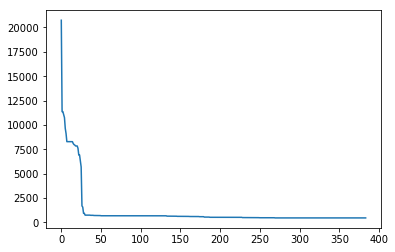

In [194]:
plt.plot(range(len(packing.CONVEGE)),packing.CONVEGE)

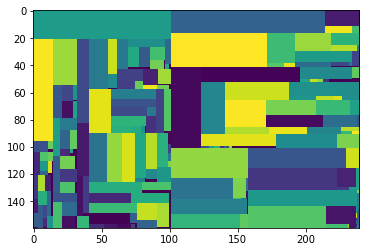

Usage 98.792  %


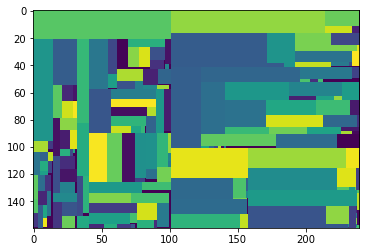

Usage 98.792  %


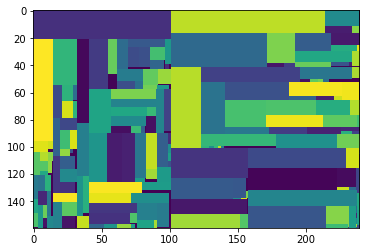

Usage 98.792  %


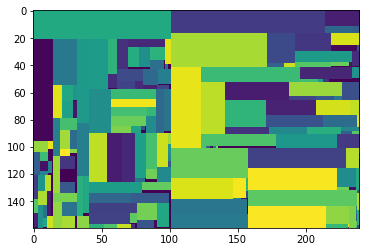

Usage 98.792  %


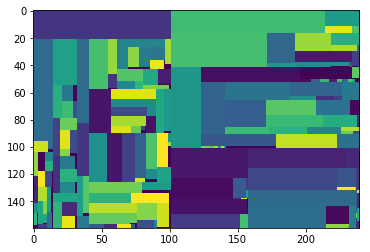

Usage 98.792  %


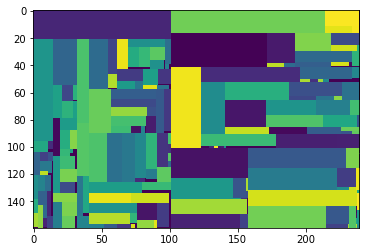

Usage 98.792  %


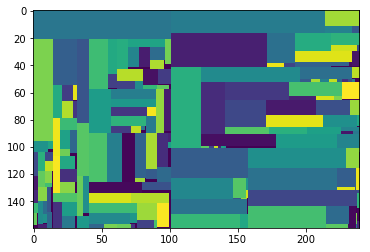

Usage 98.792  %


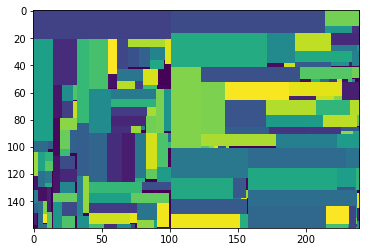

Usage 98.792  %


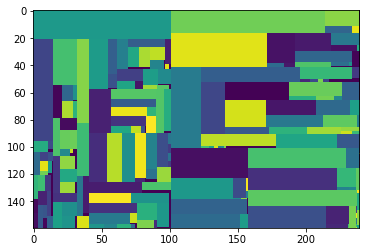

Usage 98.792  %


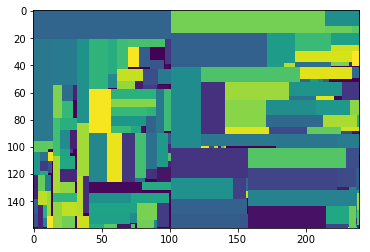

Usage 98.792  %


In [189]:
for i in range(10):
    packing.plot(i)

In [190]:
fig = plt.figure()

AttributeError: 'Figure' object has no attribute 'close'